# Data Format Guide

## Basic data format

UpSetPlot can take a Pandas Series or DataFrame object with Multi-index as input. Each `Set` is a level in `pandas.MultiIndex` with boolean values. 

### Use `Series` as input

Below is a minimal example using `Series` as input:  


In [19]:
from upsetplot import generate_counts
example_counts = generate_counts()
example_counts

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

This is a `pandas.Series` with 3-level Multi-index. Each level is a `Set`: `cat0`, `cat1`, and `cat2`. Each row is a unique subset with boolean values in indices indicating memberships of each row. The value in each row indicates the number of observations in each subset. `upsetplot` will simply plot these numbers when supplied with a `Series`:  


3 8 2


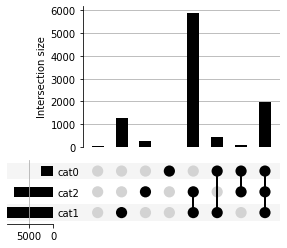

In [20]:
from upsetplot import UpSet
plt = UpSet(example_counts).plot()

Alternatively, we can supply a `Series` with each observation in a row:  


In [3]:
from upsetplot import generate_samples
example_samples = generate_samples().value
example_samples

cat0   cat1   cat2
False  True   True    1.652317
              True    1.510447
       False  True    1.584646
              True    1.279395
       True   True    2.338243
                        ...   
              True    1.701618
              True    1.577837
True   True   True    1.757554
False  True   True    1.407799
True   True   True    1.709067
Name: value, Length: 10000, dtype: float64

In this case, we can use `subset_size='count'` to have `upsetplot` count the number of observations in each unique subset and plot them:  


3 8 2


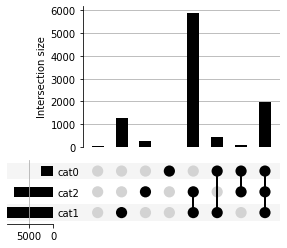

In [21]:
from upsetplot import UpSet
plt = UpSet(example_samples, subset_size = 'count').plot()

### Use `DataFrame` as input: 

A `DataFrame` can also be used as input to carry additional information.  


In [5]:
from upsetplot import generate_samples
example_samples_df = generate_samples()
example_samples_df.head()

index     value
cat0  cat1  cat2                 
False True  True      0  1.652317
            True      1  1.510447
      False True      2  1.584646
            True      3  1.279395
      True  True      4  2.338243

In this data frame, each observation has two variables: `index` and `value`. If we simply want to count the number of observations in each unique subset, we can use `subset_size='count'`:  


3 8 2


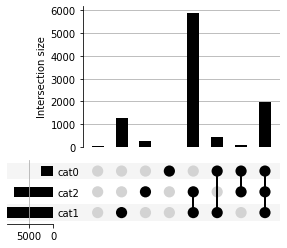

In [22]:
from upsetplot import UpSet
plt = UpSet(example_samples_df, subset_size = 'count').plot()

If for some reason, we want to plot the sum of a variable in each subset (eg. `index`), we can use `sum_over='index'`. This will make `upsetplot` to take sum of a given variable in each unique subset and plot that number:  


3 8 2


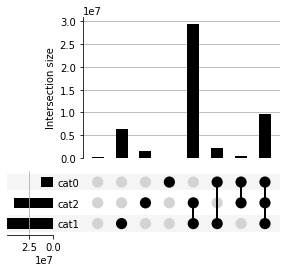

In [7]:
from upsetplot import UpSet
plt = UpSet(example_samples_df, sum_over='index', subset_size='sum').plot()

## Convert Data to UpSet-compatible format

We can convert data from common formats to be compatible with `upsetplot`.

Suppose we have three sets:  


In [8]:
mammals = ['Cat', 'Dog', 'Horse', 'Sheep', 'Pig', 'Cattle', 'Rhinoceros', 'Moose']
herbivores = ['Horse', 'Sheep', 'Cattle', 'Moose', 'Rhinoceros']
domesticated = ['Dog', 'Chicken', 'Horse', 'Sheep', 'Pig', 'Cattle', 'Duck']
(mammals, herbivores, domesticated)

(['Cat', 'Dog', 'Horse', 'Sheep', 'Pig', 'Cattle', 'Rhinoceros', 'Moose'],
 ['Horse', 'Sheep', 'Cattle', 'Moose', 'Rhinoceros'],
 ['Dog', 'Chicken', 'Horse', 'Sheep', 'Pig', 'Cattle', 'Duck'])

We can construct a data frame ready for plotting:


In [9]:
import pandas as pd

# make a data frame for each set
mammal_df = pd.DataFrame({'mammal': True, 'Name': mammals})
herbivore_df = pd.DataFrame({'herbivore': True, 'Name': herbivores})
domesticated_df = pd.DataFrame({'domesticated': True, 'Name': domesticated})

# Merge three data frames together
animals_df = mammal_df.merge(
    herbivore_df.merge(domesticated_df, on = 'Name', how = 'outer'), 
    on = 'Name', how = 'outer')

# Replace NaN with False
animals_df = animals_df.fillna(False)

# Make sets index for the data frame
animals_df = animals_df.set_index(['mammal', 'herbivore', 'domesticated'])

animals_df

Name
mammal herbivore domesticated            
True   False     False                Cat
                 True                 Dog
       True      True               Horse
                 True               Sheep
       False     True                 Pig
       True      True              Cattle
                 False         Rhinoceros
                 False              Moose
False  False     True             Chicken
                 True                Duck

Now we can plot:  


3 5 2


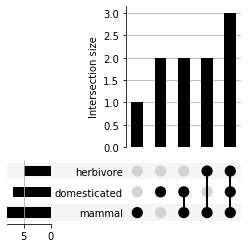

In [10]:
from upsetplot import UpSet
plt = UpSet(animals_df, subset_size='count').plot()

`upsetplot` actually provides a function `from_contents` to do this for you.   
`from_contents` takes a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) as input. The input dictionary should have set names as key and a [list](https://docs.python.org/3/tutorial/datastructures.html) of set members as values:  


In [11]:
from upsetplot import from_contents
animals_df = from_contents({'mammal': mammals, 'herbivore': herbivores, 'domesticated': domesticated})
animals_df

id
mammal herbivore domesticated            
True   False     False                Cat
                 True                 Dog
       True      True               Horse
                 True               Sheep
       False     True                 Pig
       True      True              Cattle
                 False         Rhinoceros
                 False              Moose
False  False     True             Chicken
                 True                Duck

## Converting any Data Frame to "Subset-ready" format

Let's take a look at the `movies` dataset used in the [original publication by Alexander Lex et al.](https://caleydo.org/publications/2014_infovis_upset/) and [UpSetR package](https://github.com/hms-dbmi/UpSetR).  


In [12]:
movies = pd.read_csv("../movies.csv")
movies.head()

,Name,ReleaseDate,Action,Adventure,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,AvgRating,Watches
0,Toy Story (1995),1995,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.15,2077
1,Jumanji (1995),1995,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.20,701
2,Grumpier Old Men (1995),1995,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,3.02,478
3,Waiting to Exhale (1995),1995,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,2.73,170
4,Father of the Bride Part II (1995),1995,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.01,296


In this table, each movie occupies a row with each column being a feature of the film. columns 3 to 19 records the genre each film belong in, with `1` indicating that the movie belongs to this genre.

Since `upsetplot` requires its set data be boolean values, we convert the numberical coding in this dataset to boolean values and set them as index:  


In [13]:
genres = list(movies.columns[2:len(movies.columns)-2])
movies_genre = movies[genres].astype(bool)
movies_genre = pd.concat([movies_genre, movies[[i for i in list(movies.columns) if i not in genres]]], axis=1).set_index(genres)
movies_genre.head()

Name  \
Action Adventure Children Comedy Crime Documentary Drama Fantasy Noir  Horror Musical Mystery Romance SciFi Thriller War   Western                                       
False  False     True     True   False False       False False   False False  False   False   False   False False    False False                      Toy Story (1995)   
       True      True     False  False False       False True    False False  False   False   False   False False    False False                        Jumanji (1995)   
       False     False    True   False False       False False   False False  False   False   True    False False    False False               Grumpier Old Men (1995)   
                                                   True  False   False False  False   False   False   False False    False False              Waiting to Exhale (1995)   
                                                   False False   False False  False   False   False   False False    False False    Father of the Bride Part II (1995)   

                                                                                                                                    ReleaseDate  \
Action Adventure Children Comedy Crime Documentary Drama Fantasy Noir  Horror Musical Mystery Romance SciFi Thriller War   Western                
False  False     True     True   False False       False False   False False  False   False   False   False False    False False           1995   
       True      True     False  False False       False True    False False  False   False   False   False False    False False           1995   
       False     False    True   False False       False False   False False  False   False   True    False False    False False           1995   
                                                   True  False   False False  False   False   False   False False    False False           1995   
                                                   False False   False False  False   False   False   False False    False False           1995   

                                                                                                                                    AvgRating  \
Action Adventure Children Comedy Crime Documentary Drama Fantasy Noir  Horror Musical Mystery Romance SciFi Thriller War   Western              
False  False     True     True   False False       False False   False False  False   False   False   False False    False False         4.15   
       True      True     False  False False       False True    False False  False   False   False   False False    False False         3.20   
       False     False    True   False False       False False   False False  False   False   True    False False    False False         3.02   
                                                   True  False   False False  False   False   False   False False    False False         2.73   
                                                   False False   False False  False   False   False   False False    False False         3.01   

                                                                                                                                    Watches  
Action Adventure Children Comedy Crime Documentary Drama Fantasy Noir  Horror Musical Mystery Romance SciFi Thriller War   Western           
False  False     True     True   False False       False False   False False  False   False   False   False False    False False       2077  
       True      True     False  False False       False True    False False  False   False   False   False False    False False        701  
       False     False    True   False False       False False   False False  False   False   True    False False    False False        478  
                                                   True  False   False False  False   False   False   False False    False False        170  
                                                   False False   False Fa

Now let's plot!  


17 280 2


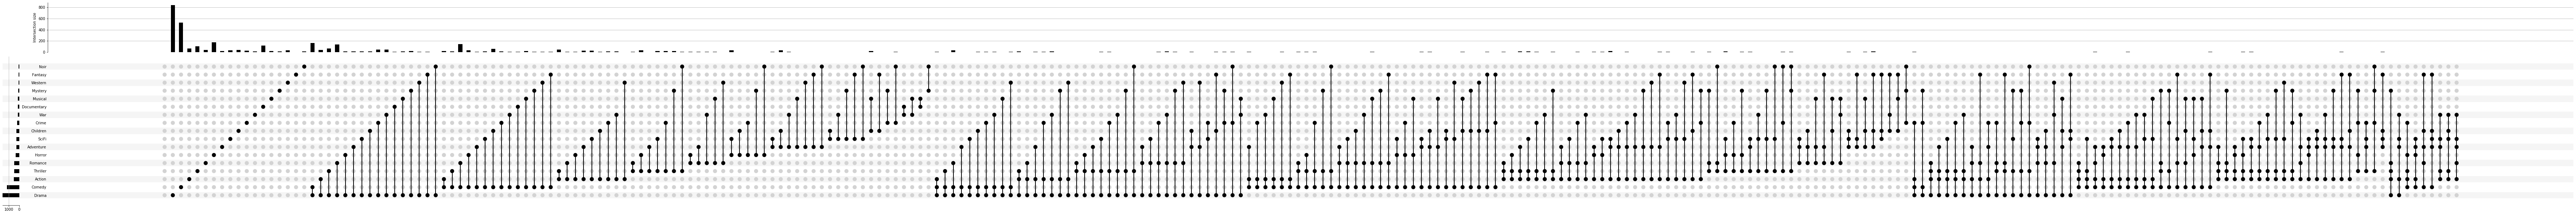

In [23]:
import upsetplot as upset
plt = upset.UpSet(movies_genre, subset_size='count').plot()

Above plot gives every single subset based on the input data. Since we have a 17-level multi-index, we are seeing $2^{17}=131072$ possible subsets (although in this dataset we have only 280 total subsets). In cases like this, it can be helpful to set an observation threshold to exclude low-count subsets. This can be achieved by grouping data mannually and filter by counts:


17 14 2


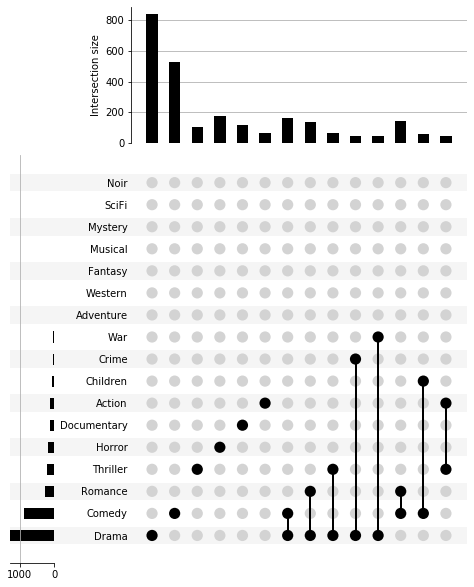

In [24]:
movies_genre_grouped = movies_genre.groupby(level=genres).count()
movies_genre_subset = movies_genre_grouped[movies_genre_grouped.Name>40]
plt = upset.UpSet(movies_genre_subset.Name).plot()